# California Housing Regression: A Complete Example
The California Housing dataset in scikit-learn is a classic real-world dataset used for regression problems. It contains information about housing in California from the 1990 U.S. Census, with the goal of predicting median house value in various districts based on demographic and geographic features.

## Load and explore data

### The following code shows that the dataset is stored as a dictionary with four important keys:

- "data" contains the main dataset as a 2D array, where each row represents a data point and each column corresponds to a feature (variable).
- "feature_names" lists the names of the input variables. Together with "data", they represent the input (X) values and their labels.
- "target" holds the output values in a 1D array — these are the target (y) values that the model will learn to predict.
- "target_names" provides the name or label of the output variable, which corresponds to the values in "target".

In [1]:
# import the module to load the included data
from sklearn.datasets import fetch_california_housing

In [2]:
# load the California housing dataset
data = fetch_california_housing()

In [3]:
# show how data is organized
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
# breakdown
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Data shape:", data.data.shape)
print("Target shape:", data.target.shape)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target names: ['MedHouseVal']
Data shape: (20640, 8)
Target shape: (20640,)


### Convert the dataset to Pandas dataframe
Pandas is a powerful Python library for data manipulation and analysis. 
It provides data structures like DataFrame and Series, which make it easy to handle structured data.

In Pandas,
- A DataFrame is like a table or spreadsheet with rows and multiple columns, where each column can have a different data type (e.g., numbers, strings, dates).
- A Series is like a single column of a table — it's a one-dimensional labeled array.

In [5]:
import pandas as pd

In [6]:
xs = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name=data.target_names[0])

In [7]:
# Show the first few rows of the DataFrame
print(xs.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [8]:
print(y.name)
print(y.head())

MedHouseVal
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


### Save the dataframe to files and load them back
This demonstrates the data can be loaded from files to dataframe directly

In [9]:
# Save to files
xs.to_csv("california_housing.csv", index=False)
y.to_csv("california_housing_target.csv", index=False)

# Load the dataset from CSV files
xs = pd.read_csv("california_housing.csv")
y = pd.read_csv("california_housing_target.csv")

In [23]:
# show what's in xs
xs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [24]:
# show what's in y
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


### Visualize the data
Use plots to understand the relationships between features and the target (MedHouseVal).

- Features are variables (xs)
- Target is the result (y)

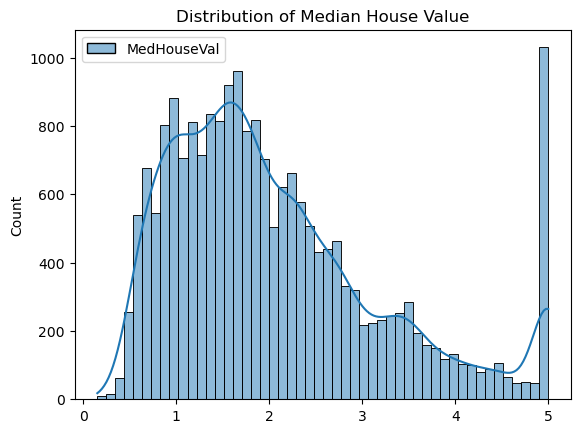

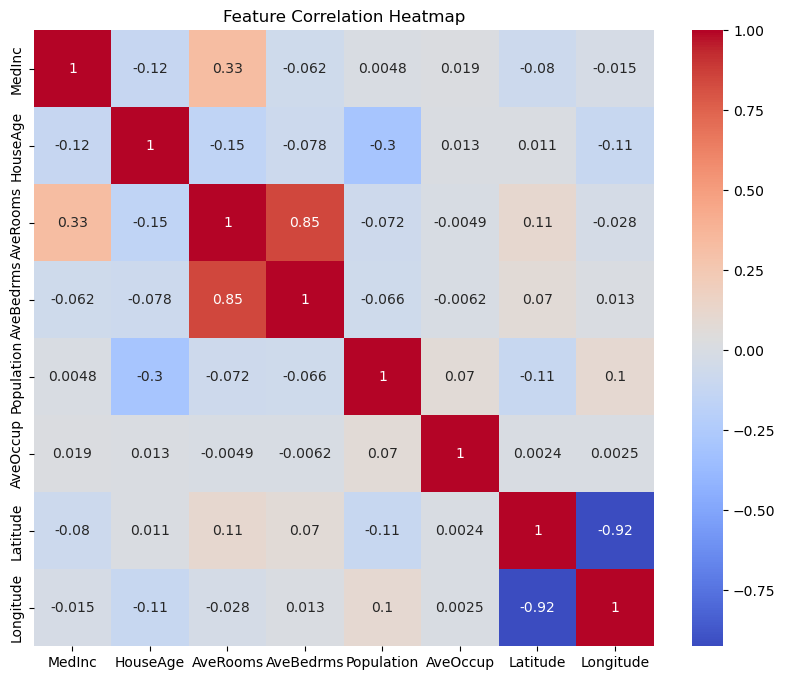

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the target
sns.histplot(y, bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(xs.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Notes
1. **KDE = True**  
In Seaborn, the kde=True argument in the statement sns.histplot(y, bins=50, kde=True) tells Seaborn to add a Kernel Density Estimate (KDE) curve on top of the histogram.

What it means:
The histogram shows the frequency distribution of the data in bins.

The KDE is a smooth curve that estimates the probability density function of the data — it gives a continuous representation of where the data is concentrated.

So with kde=True, you’re getting both:

A bar-based view (histogram),

and a smoothed curve (KDE) showing the estimated distribution.

This helps you better visualize the shape and spread of your data.

2. **xs.coor()**
xs.corr() computes the pairwise correlation of columns in the DataFrame xs, excluding NA/null values.

By default, it uses Pearson correlation, which measures linear relationships.

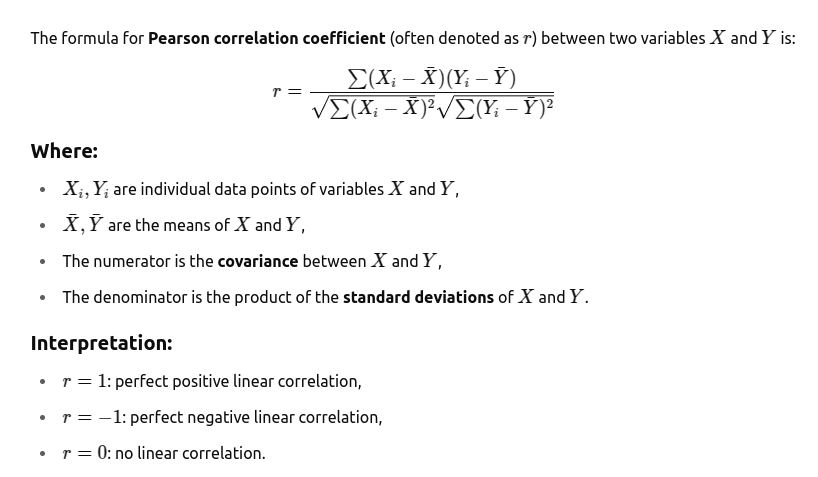


## Prepare the data
This involves 
- dividing the data into training set and testing set.
- scaling the features properly so that they are on the same scale.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split. This split assign 80% of the data as traning set and 20% as testing set, 
# random_state is given the random seed 42 so that the split returns the same sets. 
# You can use other random seeds.
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Notes on the above code
These lines standardize the feature values in X_train and X_test using StandardScaler from scikit-learn.

Standardizing is different from normalizing. When standardinging a set of data, it
- computes the mean and shift all data to make mean = 0
- compute standard deviation and scale the data to make standard deviation = 1
 
After the operation, each feature is transformed to have:
- Mean = 0
- Standard deviation = 1

Difference between fit_transform() and transform():

|Method	| Purpose|
|---|---|
|fit_transform()|Computes the mean and std on X_train, then transforms it.|
|transform()|Uses the already computed mean and std to transform new data.|


So:
- fit_transform(X_train): learns the parameters from training data and scales it.
- transform(X_test): uses the same parameters from training data to scale the test data consistently.
- This is critical for avoiding data leakage — we never want test data to influence model training or scaling.


## Train linear models


In [14]:
from sklearn.linear_model import LinearRegression

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_linear = lr.predict(X_test_scaled)


### Notes on the above code

**Training**  
- First, the code creates an instance `lr`, which is a LinearRegression class from sklearn.linear_model.
- Then, teh code trains the model (lr) using the scaled training data.
    - X_train_scaled: The input features (independent variables), which have been scaled (e.g., using StandardScaler).
    - y_train: The target values the model is learning to predict.  
- The model finds the best-fit line by minimizing the least squares error between predictions and true values.
- The outcome of the fitting is stored inside the model `lr`. Specifically lr.coef_ and lr.intercept_, coeffecient and intercept for each feature.


In [15]:
# Obtain feature names
print(X_train.columns)  # what data type is columns
print(X_train.columns.to_list()) # convert to list

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [16]:
# Show coefficients and intercept:
# Assuming you have a list of feature names
feature_names = X_train.columns.to_list()  # e.g., from a DataFrame: X_train.columns
print(feature_names) # reveal data type
print(lr.coef_) # reveal data type
for name, coef in zip(feature_names, lr.coef_[0]):
    print(f"{name}: {coef:.4f}")
print()
print(f"Intercept is: {lr.intercept_[0]:.4f}")

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
  -0.89692888 -0.86984178]]
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698

Intercept is: 2.0719


**Predicting**  
`y_pred_linear = lr.predict(X_test_scaled)` 
- This uses the trained model to predict values for the scaled test input (X_test_scaled).
- The output y_pred contains the model's predicted values for the corresponding test samples.

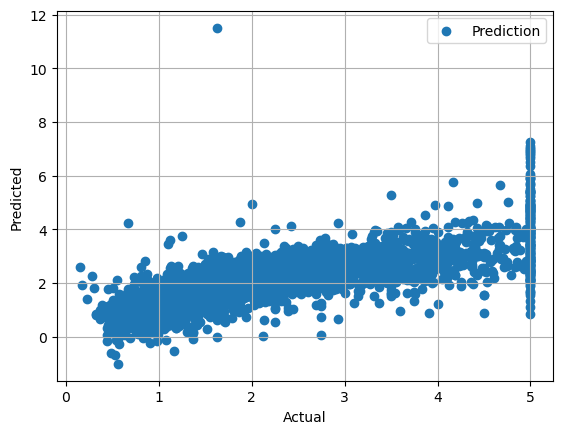

In [17]:
# Visiualize the predicted values over actual values
y_values = y_test["MedHouseVal"].values
y_predicted = y_pred_linear.flatten()

plt.scatter(y_test, y_predicted, label='Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate the result

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")

Linear Regression MSE: 0.56
Linear Regression RMSE: 0.75
Linear Regression R²: 0.58


### Notes on the above code
MSE is a measurement of fitting quality

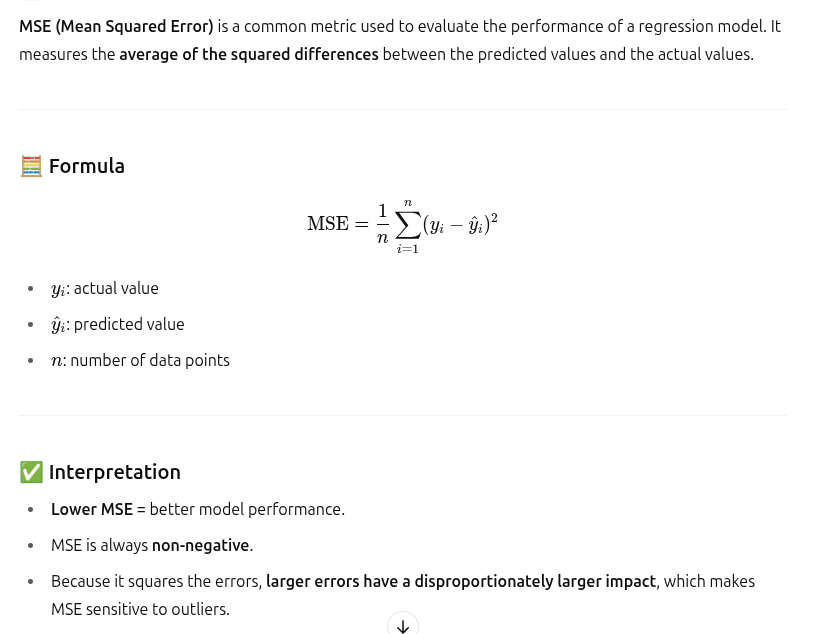

When using scaled values (e.g. from StandardScaler), the interpretation of MSE (Mean Squared Error) changes because your features and/or targets have been transformed to a standardized scale.

What is the Range of MSE with Scaled Values?

MSE∈ = [0,∞)

It is always non-negative because it’s the mean of squared errors.

Typical Range when using StandardScaler (mean=0, std=1):

If the target variable y is also scaled, then:
- MSE ≈ 1 means the model is about as good as guessing the mean
- MSE < 1 --> model is better than baseline.
- MSE ≈ 0 --> perfect prediction.
- MSE > 1 --> model is worse than simply predicting the mean.

What MSE is Considered Good?

It depends on whether you're using scaled or unscaled data. If y is scaled (standardized): 
- MSE ≈ 0.0 - 0.2 --> excellent fit.
- MSE ≈ 0.3 - 0.6 --> good to moderate.
- MSE > 1.0 --> poor model; worse than mean prediction.

**RMSE is the square root of MSE. therefore it has the same unit as target.**

R2 is a measurement of fitting variance.

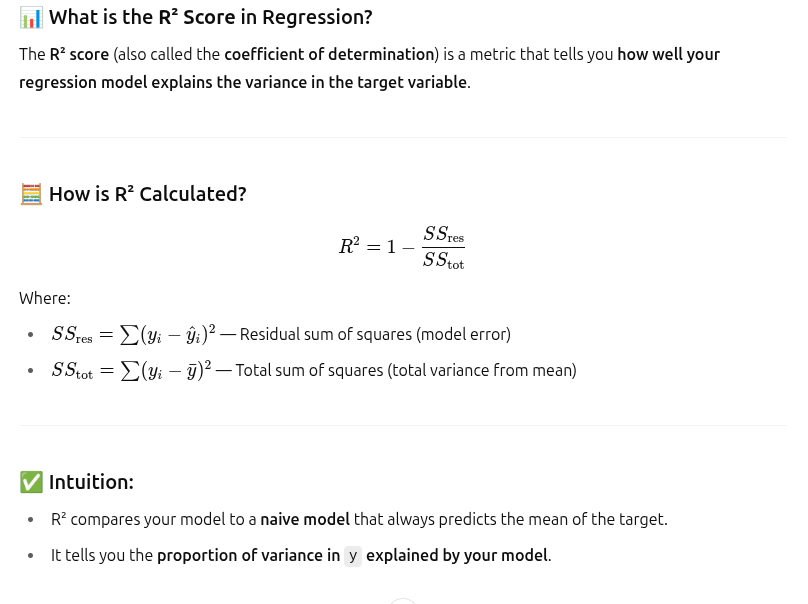
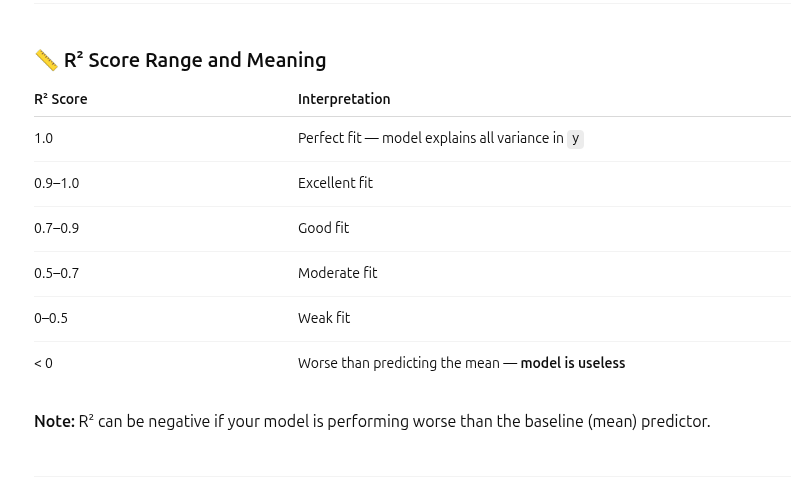

## Use Random Forest regression

**Random Forest Regression** is a machine learning algorithm that uses an ensemble of decision trees to perform regression tasks, meaning it predicts continuous numerical values rather than categories.

### How It Works:
1. Bootstrapping the Data (Bagging):
    - The algorithm starts by creating multiple subsets of the training data using random sampling with replacement (this is called bootstrapping).
    - Each subset is used to train a separate decision tree.

2. Building Multiple Decision Trees:
    - For each decision tree:
        - A random subset of features is selected at each split (not all features are considered). This adds further randomness and helps reduce correlation between trees.
        - The tree is grown to a specified depth or until stopping criteria are met (e.g., minimum number of samples per leaf).

3. Making Predictions:
    - When predicting a value for a new data point:
        - Each decision tree in the forest makes its own prediction (a numerical value).
        - The final prediction is the average of all the individual tree predictions.
          
### Key Features and Advantages:
- Reduces Overfitting: Averaging many trees reduces the risk of overfitting compared to a single decision tree.
- Handles Non-linear Relationships: It captures complex interactions and non-linear patterns in the data.
- Robust to Noise and Outliers: Due to ensemble averaging.
- Feature Importance: It can provide estimates of which features are most important in predicting the target.

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train.values.ravel())
rf_pred = rf.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest MSE: 0.26
Random Forest R²: 0.81


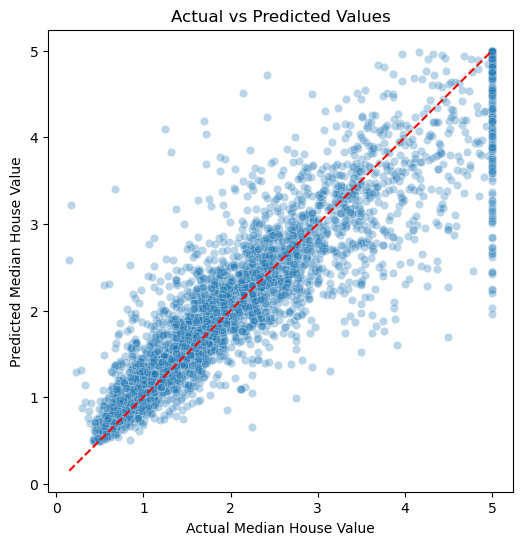

In [20]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test.values.ravel(), y=rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.show()

Feature Importances:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


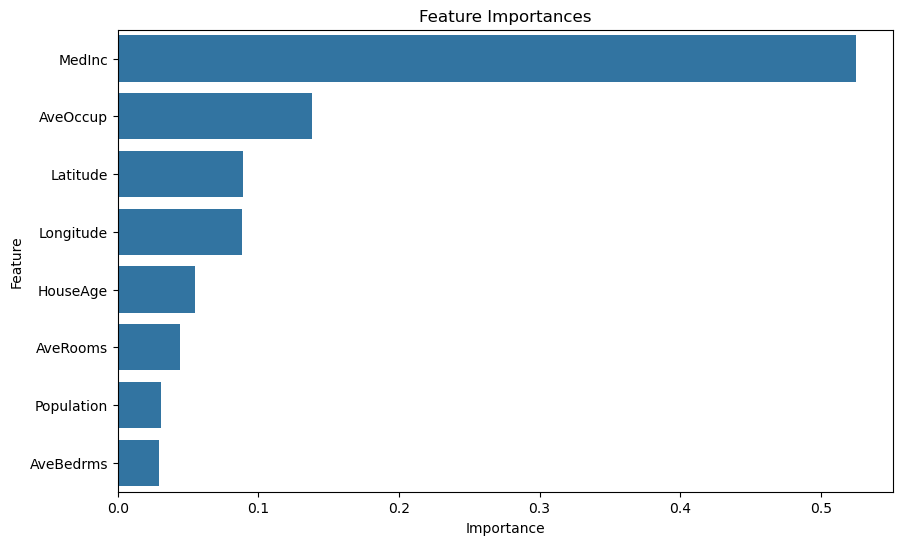

In [21]:
# Report feature importance
feature_importances = rf.feature_importances_
feature_names = xs.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Save and Reuse Trained Models
A trained model can be saved to a file and loaded back for later use.

In [22]:
import joblib

# Save models
joblib.dump(lr, 'linear_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')


# Load models
lr_loaded = joblib.load('linear_regression_model.pkl')
rf_loaded = joblib.load('random_forest_model.pkl')

# Make prediction with loaded models

# y_pred_linear = lr.predict(X_test_scaled)
y_pred_linear_loaded = lr_loaded.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_linear_loaded)
r2 = r2_score(y_test, y_pred_linear_loaded)
print("Evaluate the result of loaded linear regression:")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")
print()

# rf_pred = rf.predict(X_test_scaled)
rf_pred_loaded = rf_loaded.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred_loaded)
rf_r2 = r2_score(y_test, rf_pred_loaded)
print("Evaluate the result of loaded random forest regression:")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Evaluate the result of loaded linear regression:
Linear Regression MSE: 0.56
Linear Regression R²: 0.58

Evaluate the result of loaded random forest regression:
Random Forest MSE: 0.26
Random Forest R²: 0.81
